## ***Author :*** [***`Fawad Ali Shaikh`***](https://www.kaggle.com/fawadalishaikh)
##***Competition :***[***`House Prices - Advanced Regression Techniques`***](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)


In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download house-prices-advanced-regression-techniques


house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip

! unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


### ***Import Libraries***

In [ ]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# For ML tasks
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# dispaly all columns & rows

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## ***Lets do EDA `(Exploratory Data Analysis)`***

In [ ]:
# Shape of dataset

df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
print('In Train dataset')
print(f'Number of rows: {df_train.shape[0]}')
print(f'Number of columns: {df_train.shape[1]}')
print('------------------------')
print('In Test dataset')
print(f'Number of rows: {df_test.shape[0]}')
print(f'Number of columns: {df_test.shape[1]}')

In Train dataset
Number of rows: 1460
Number of columns: 81
------------------------
In Test dataset
Number of rows: 1459
Number of columns: 80


In [ ]:
# columns in train

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# columns in test

df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Information about train dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Information about test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# Summary of train dataset

df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
# Summary of test dataset

df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [ ]:
# Unique values in train datset

print('Unique values in Train dataset\n')
print(df_train.nunique())

Unique values in Train dataset

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753


In [ ]:
# Unique values in test datset

print('Unique values in Test dataset\n')
print(df_test.nunique())

Unique values in Test dataset

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       115
LotArea          1106
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          5
BldgType            5
HouseStyle          7
OverallQual        10
OverallCond         9
YearBuilt         106
YearRemodAdd       61
RoofStyle           6
RoofMatl            4
Exterior1st        13
Exterior2nd        15
MasVnrType          3
MasVnrArea        303
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        669
BsmtFinType2        6
BsmtFinSF2        161
BsmtUnfSF         793
TotalBsmtSF       736
Heating             4
HeatingQC           5
CentralAir          2
Electrical          4
1stFlrSF          789
2

In [ ]:
# Check null values in train dataset

print(df_train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# check null values in percentage

print(df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [ ]:
# Check null values in test dataset

print(df_test.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# check null values in percentage

print(df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100)

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
MasVnrType       61.274846
FireplaceQu      50.034270
LotFrontage      15.558602
GarageYrBlt       5.346127
GarageQual        5.346127
GarageFinish      5.346127
GarageCond        5.346127
GarageType        5.209047
BsmtCond          3.084304
BsmtQual          3.015764
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
MasVnrArea        1.028101
MSZoning          0.274160
BsmtHalfBath      0.137080
Utilities         0.137080
Functional        0.137080
BsmtFullBath      0.137080
BsmtFinSF1        0.068540
BsmtFinSF2        0.068540
BsmtUnfSF         0.068540
KitchenQual       0.068540
TotalBsmtSF       0.068540
Exterior2nd       0.068540
GarageCars        0.068540
Exterior1st       0.068540
GarageArea        0.068540
SaleType          0.068540
MiscVal           0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
YrSold            0.000000
T

In [ ]:
# plot it using plotly (Train)

fig = px.imshow(df_train.isnull())
fig.update_layout(title='<b><i>Heatmap of Train dataset</i></b>')
fig.show()

In [ ]:
# Plot it using plotly

fig = px.imshow(df_test.isnull())
fig.update_layout(title='<b><i>Heatmap of Test dataset</i></b>')
fig.show()

***So, there is a differnce between `null values` in train & test dataset. Test dataset has `more null values` than train dataset***

## ***Remove Null Values***

In [ ]:
# list down the columns that contains null values in train dataset (percentage)

print(df_train.isnull().sum().sort_values(ascending=False)[df_train.isnull().sum()>0]/len(df_train)*100)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


***So these are the columns that have `null values` in train dataset***

In [ ]:
# list down the columns that contains null values in test dataset (percentage)

print(df_test.isnull().sum().sort_values(ascending=False)[df_test.isnull().sum()>0]/len(df_test)*100)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
BsmtFullBath     0.137080
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
Exterior2nd      0.068540
GarageCars       0.068540
Exterior1st      0.068540
GarageArea       0.068540
SaleType         0.068540
dtype: float64


***So these are the columns that have `null values` in test dataset***

In [ ]:
# Drop columns in train dataset with >50% missing values

missing_train = df_train.isnull().sum().sort_values(ascending=False)[df_train.isnull().sum()>0]/len(df_train)*100
columns_to_drop = missing_train[missing_train > 50].index
df_train.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
# Drop columns in test dataset with >50% missing values

missing_test = df_test.isnull().sum().sort_values(ascending=False)[df_test.isnull().sum()>0]/len(df_test)*100
columns_to_drop = missing_test[missing_test > 50].index
df_test.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
# Shape of train dataset after removing columns

df_train.shape

(1460, 76)

In [ ]:
# Null values in train dataset

print('Null values in Train dataset\n')
print(df_train.isnull().sum().sort_values(ascending=False)[df_train.isnull().sum()>0]/len(df_train)*100)

Null values in Train dataset

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [ ]:
# Shape of test dataset after removing columns

df_test.shape

(1459, 74)

In [ ]:
# Null values in test dataset

print('Null values in Test dataset\n')
print(df_test.isnull().sum().sort_values(ascending=False)[df_test.isnull().sum()>0]/len(df_test)*100)

Null values in Test dataset

LotFrontage     15.558602
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
Functional       0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
BsmtFullBath     0.137080
Exterior2nd      0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
Exterior1st      0.068540
GarageCars       0.068540
GarageArea       0.068540
SaleType         0.068540
dtype: float64


### ***Spilit columns based on their datatypes***

In [ ]:
# Separate numeric and categorical columns on train dataset

numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numeric columns: 38
Categorical columns: 38


In [ ]:
# Separate numeric and categorical columns on test dataset

numeric_cols = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_test.select_dtypes(include=['object']).columns

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numeric columns: 37
Categorical columns: 37


### ***Impute Numerical vlaues using KNN***

In [ ]:
# Impute missing values in numerical columns using KNN

knn_imputer = KNNImputer(n_neighbors=5)
df_train[numeric_cols] = knn_imputer.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = knn_imputer.transform(df_test[numeric_cols])


In [ ]:
# Impute missing values in categorical columns using the most frequent value

simple_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_cols] = simple_imputer.fit_transform(df_train[categorical_cols])
df_test[categorical_cols] = simple_imputer.transform(df_test[categorical_cols])

In [ ]:
# drop FireplaceQu column

df_train.drop('FireplaceQu',axis=1,inplace=True)


In [ ]:
# Check null values in train datsets

print('Null values in Train dataset\n')
print(df_train.isnull().sum().sort_values(ascending=False))

Null values in Train dataset

Id               0
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
HeatingQC        0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
YearBuilt        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
S

In [ ]:
# Check null values in test datsets

print('Null values in Test dataset\n')
print(df_test.isnull().sum().sort_values(ascending=False))

Null values in Test dataset

Id               0
GarageType       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
Fireplaces       0
GarageYrBlt      0
MSSubClass       0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
HeatingQC        0
Heating          0
TotalBsmtSF      0
BsmtUnfSF        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
St

***So we have impute all `null values`***

## ***Pre-Processing***

In [ ]:
# columns that have datatype categorical (Train)

categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}")

Categorical columns: 37


In [ ]:
# columns that have datatype categorical (Test)

categorical_cols = df_test.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}")

Categorical columns: 37


In [ ]:
# Encode categorical features using Label Encoder

label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column].astype(str))
    df_test[column] = le.transform(df_test[column].astype(str))
    label_encoders[column] = le

In [ ]:
df_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1.0        60.0         3         65.0   8450.0       1         3   
1  2.0        20.0         3         80.0   9600.0       1         3   
2  3.0        60.0         3         68.0  11250.0       1         0   
3  4.0        70.0         3         60.0   9550.0       1         0   
4  5.0        60.0         3         84.0  14260.0       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5          7.0          5.0     2003.0   
1           2         0           2          6.0          8.0     1976.0   
2           2         0           5          7.0          5.0     2001.0   
3           2         0           5          7.0          5.0     1915.0   
4           2         0           5          8.0          5.0     2000.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
0        2003.0          1         1           12           13       196.0   
1        1976.0          1         1            8            8         0.0   
2        2002.0          1         1           12           13       162.0   
3        1970.0          1         1           13           15         0.0   
4        2000.0          1         1           12           13       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         3             3   
1          3          4           1         2         3             1   
2          2          4           2         2         3             2   
3          3          4           0         3         1             3   
4          2          4           2         2         3             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2       706.0             5         0.0      150.0        856.0   
1             0       978.0             5         0.0      284.0       1262.0   
2             2       486.0             5         0.0      434.0        920.0   
3             0       216.0             5         0.0      540.0        756.0   
4             2       655.0             5         0.0      490.0       1145.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4     856.0     854.0   
1        1          0           1           4    1262.0       0.0   
2        1          0           1           4     920.0     866.0   
3        1          2           1           4     961.0     756.0   
4        1          0           1           4    1145.0    1053.0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0     1710.0           1.0           0.0       2.0       1.0   
1           0.0     1262.0           0.0           1.0       2.0       0.0   
2           0.0     1786.0           1.0           0.0       2.0       1.0   
3           0.0     1717.0           1.0           0.0       1.0       0.0   
4           0.0     2198.0           1.0           0.0       2.0       1.0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0           3.0           1.0            2           8.0           6   
1           3.0           1.0            3           6.0           6   
2           3.0           1.0            2           6.0           6   
3           3.0           1.0            2           7.0           6   
4           

In [ ]:
df_train.shape

(1460, 75)

In [ ]:
df_test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461.0        20.0         2         80.0  11622.0       1         3   
1  1462.0        20.0         3         81.0  14267.0       1         0   
2  1463.0        60.0         3         74.0  13830.0       1         0   
3  1464.0        60.0         3         78.0   9978.0       1         0   
4  1465.0       120.0         3         43.0   5005.0       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            12           1   
1            3          0          0          0            12           2   
2            3          0          4          0             8           2   
3            3          0          4          0             8           2   
4            1          0          4          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2          5.0          6.0     1961.0   
1           2         0           2          6.0          6.0     1958.0   
2           2         0           5          5.0          5.0     1997.0   
3           2         0           5          6.0          6.0     1998.0   
4           2         4           2          8.0          5.0     1992.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
0        1961.0          1         1           12           13         0.0   
1        1958.0          3         1           13           14       108.0   
2        1998.0          1         1           12           13         0.0   
3        1998.0          1         1           12           13        20.0   
4        1992.0          1         1            6            6         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         3         3             3   
1          3          4           1         3         3             3   
2          3          4           2         2         3             3   
3          3          4           2         3         3             3   
4          2          4           2         2         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             4       468.0             3       144.0      270.0        882.0   
1             0       923.0             5         0.0      406.0       1329.0   
2             2       791.0             5         0.0      137.0        928.0   
3             2       602.0             5         0.0      324.0        926.0   
4             0       263.0             5         0.0     1017.0       1280.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          4           1           4     896.0       0.0   
1        1          4           1           4    1329.0       0.0   
2        1          2           1           4     928.0     701.0   
3        1          0           1           4     926.0     678.0   
4        1          0           1           4    1280.0       0.0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0      896.0           0.0           0.0       1.0       0.0   
1           0.0     1329.0           0.0           0.0       1.0       1.0   
2           0.0     1629.0           0.0           0.0       2.0       1.0   
3           0.0     1604.0           0.0           0.0       2.0       1.0   
4           0.0     1280.0           0.0           0.0       2.0       0.0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0           2.0           1.0            3           5.0           6   
1           3.0           1.0            2           6.0           6   
2           3.0           1.0            3           6.0           6   
3           3.0           1.0            2           7.0           6 

In [ ]:
df_test.shape

(1459, 74)

In [ ]:
df_train.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096     0.008557 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.379791 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.100492 -0.034452   
LotFrontage    0.008557   -0.379791 -0.100492     1.000000  0.423620   
LotArea       -0.033226   -0.139781 -0.034452     0.423620  1.000000   
Street         0.008916   -0.024969  0.087654    -0.058418 -0.197131   
LotShape       0.032122    0.119289  0.061887    -0.202569 -0.165315   
LandContour   -0.019659   -0.002940 -0.017854    -0.083276 -0.149083   
Utilities      0.013324   -0.022844 -0.001192     0.001409  0.010123   
LotConfig      0.049756    0.075910 -0.009895    -0.216655 -0.121161   
LandSlope      0.005847   -0.025672 -0.022055     0.142529  0.436868   
Neighborhood  -0.013735   -0.005985 -0.249679     0.080008  0.044569   
Condition1    -0.003815   -0.024762 -0.027874     0.006933  0.023846   
Condition2     0.001839   -0.042395  0.044606     0.022019  0.022164   
BldgType       0.021912    0.746063  0.005690    -0.460455 -0.205721   
HouseStyle     0.018111    0.397161 -0.105315     0.042853 -0.033190   
OverallQual   -0.028365    0.032628 -0.160099     0.211864  0.105806   
OverallCond    0.012609   -0.059316  0.186951    -0.032634 -0.005636   
YearBuilt     -0.012713    0.027850 -0.308908     0.091596  0.014228   
YearRemodAdd  -0.021998    0.040581 -0.174728     0.054598  0.013788   
RoofStyle      0.038675   -0.117817 -0.000301     0.146289  0.077054   
RoofMatl      -0.022562   -0.031336  0.005133     0.130979  0.149837   
Exterior1st   -0.034694   -0.089159 -0.008558     0.057938  0.004256   
Exterior2nd   -0.042847   -0.137229  0.006963     0.074984 -0.003930   
MasVnrArea    -0.049429    0.022272 -0.067071     0.175572  0.103694   
ExterQual      0.001689   -0.017161  0.200536    -0.154657 -0.057275   
ExterCond      0.029826   -0.003254 -0.096041     0.021291  0.015160   
Foundation     0.008514    0.058126 -0.235174     0.071380 -0.011081   
BsmtQual       0.051070   -0.041065  0.128245    -0.132866 -0.065150   
BsmtCond       0.006762   -0.013652 -0.010528     0.036526  0.012366   
BsmtExposure  -0.024613   -0.064221  0.037209    -0.129900 -0.141043   
BsmtFinType1   0.014204    0.016599  0.024688    -0.043226 -0.061880   
BsmtFinSF1    -0.005024   -0.069836 -0.049128     0.235451  0.214103   
BsmtFinType2   0.045159    0.041195 -0.031718    -0.057404 -0.068954   
BsmtFinSF2    -0.005968   -0.065649  0.028086     0.071286  0.111170   
BsmtUnfSF     -0.007940   -0.140759 -0.046749     0.105762 -0.002618   
TotalBsmtSF   -0.015415   -0.238518 -0.087834     0.377522  0.260833   
Heating        0.042120    0.048009  0.056866    -0.026511  0.028158   
HeatingQC      0.002157    0.020760  0.134279    -0.054738  0.004212   
CentralAir     0.009821   -0.101774 -0.049523     0.074100  0.049755   
Electrical     0.037632    0.051945 -0.070818     0.065573  0.043856   
1stFlrSF       0.010496   -0.251758 -0.055614     0.453371  0.299475   
2ndFlrSF       0.005590    0.307886 -0.051481     0.081079  0.050986   
LowQualFinSF  -0.044230    0.046474  0.011520     0.031878  0.004779   
GrLivArea      0.008273    0.074853 -0.082615     0.403842  0.263116   
BsmtFullBath   0.002289    0.003491 -0.018526     0.100897  0.158155   
BsmtHalfBath  -0.020155   -0.002333  0.007193     0.025841  0.048046   
FullBath       0.005587    0.131608 -0.198290     0.197357  0.126031   
HalfBath       0.006784    0.177354 -0.133876     0.057831  0.014259   
BedroomAbvGr   0.037719   -0.023438 -0.016471     0.274357  0.119690   
KitchenAbvGr   0.002951    0.281721  0.049434     0.002807 -0.017784   
KitchenQual   -0.004432    0.010129  0.128976    -0.159434 -0.057018   
TotRmsAbvGrd   0.027239    0.040380 -0.043200     0.355917  0.190015   
Functional    -0.001064    0.003711 -0.095722    -0.002131 -0.022317   
Fireplaces    -0.019772   -0.045569 -0.011349     0.276028  0

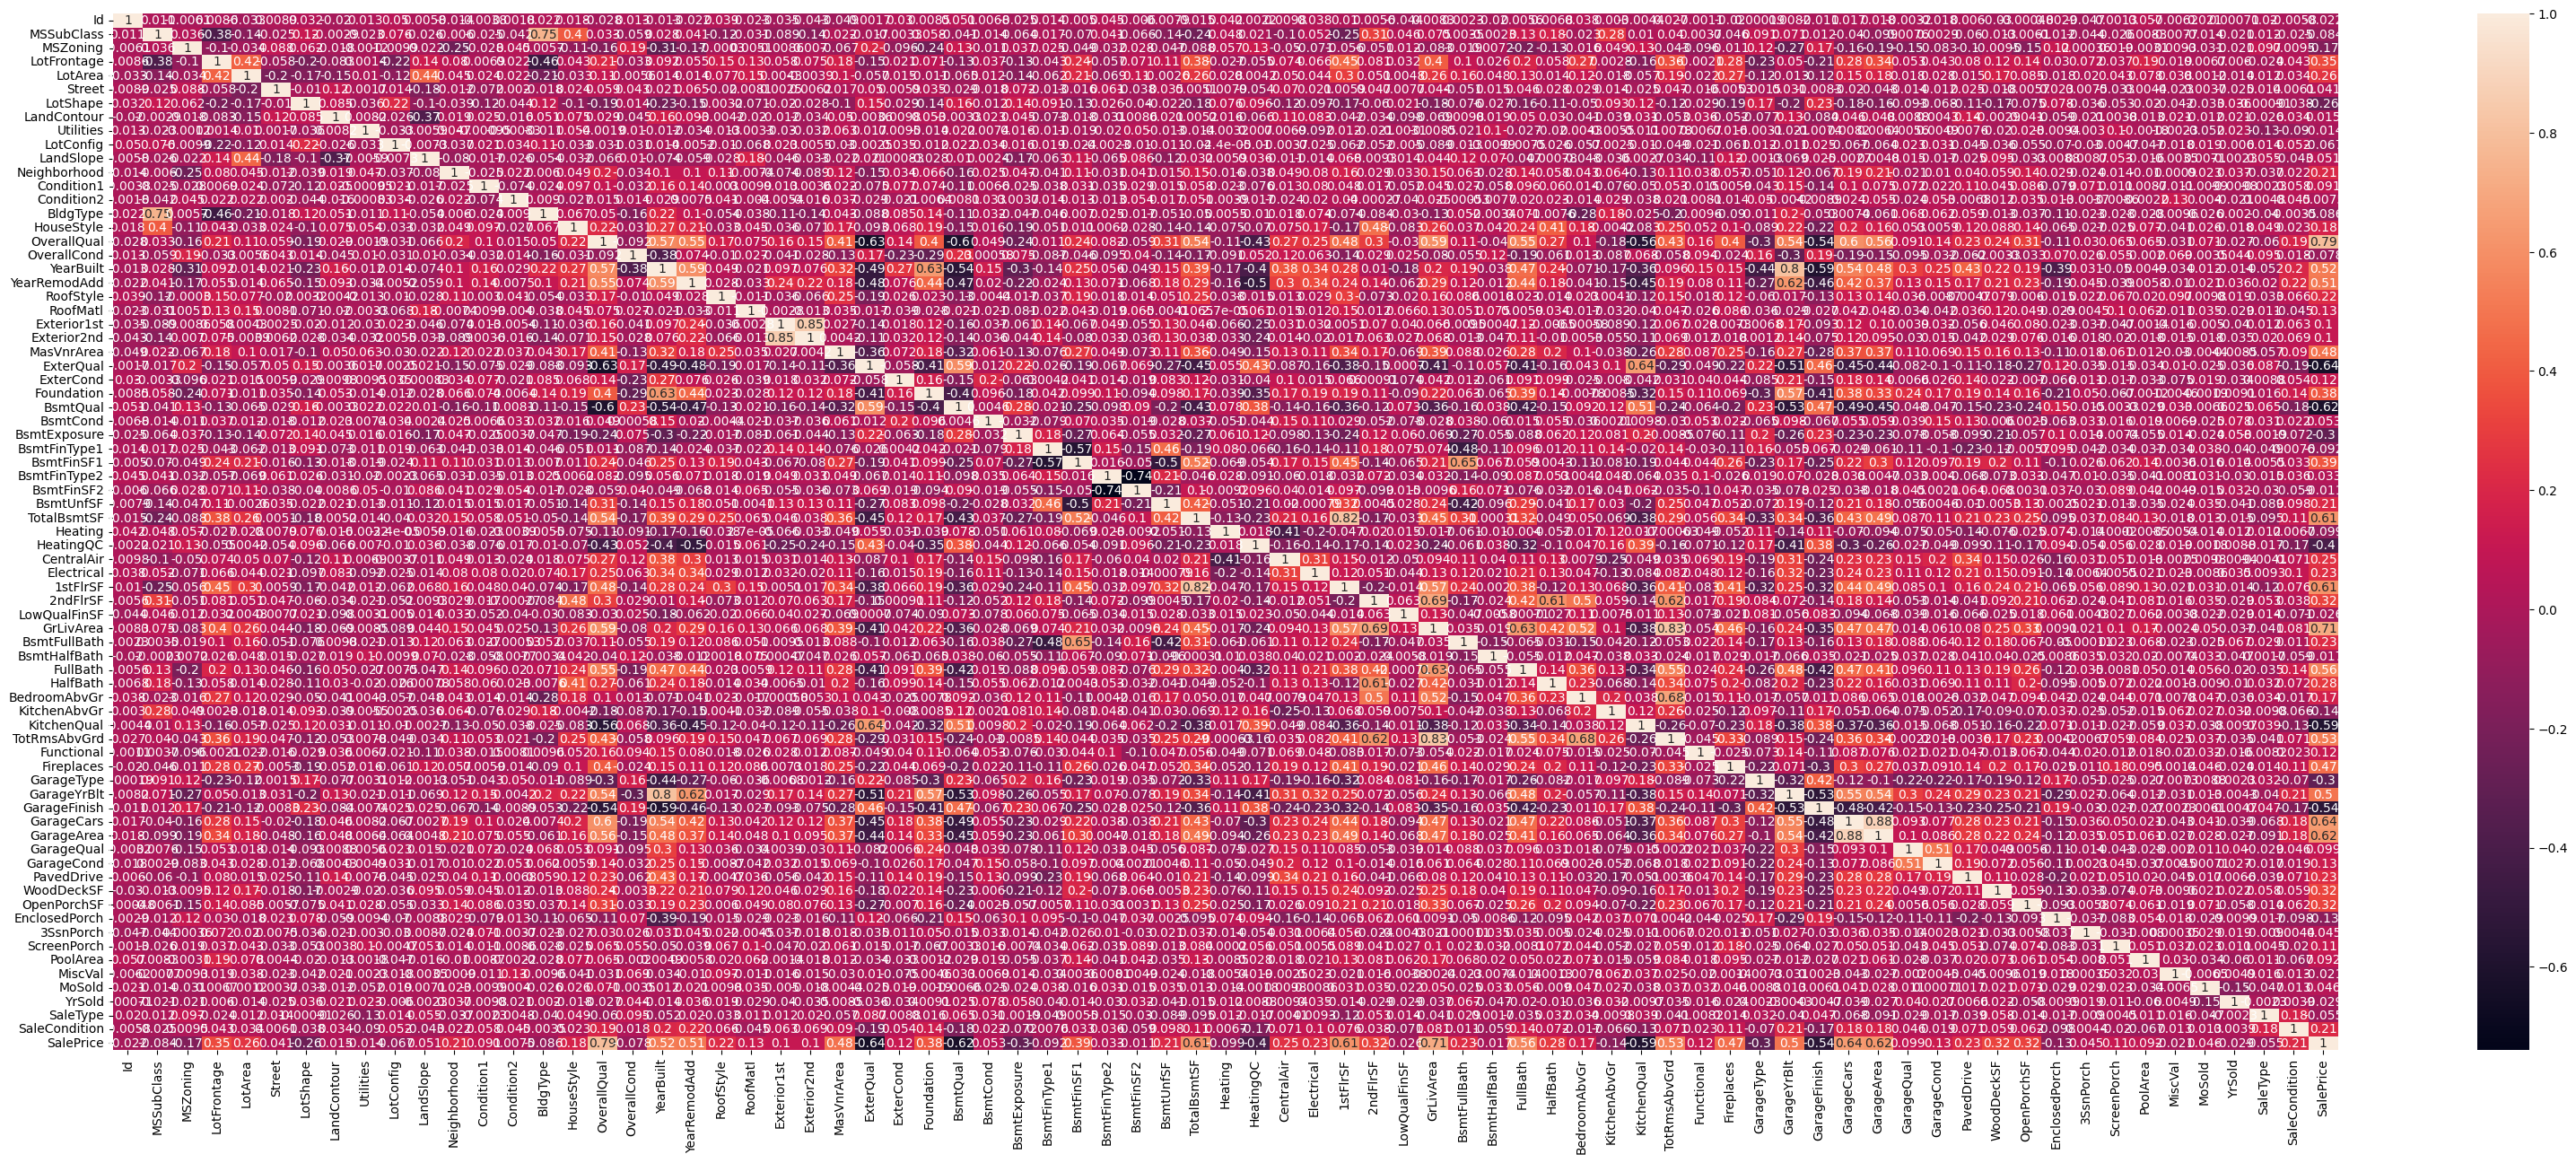

In [ ]:
# create heatmap

plt.figure(figsize=(40,15))
sns.heatmap(df_train.corr(),annot=True)
plt.show()



In [ ]:
#correlation_matrix = df_train.corr()
#correlation_with_target = correlation_matrix['SalePrice'].abs()  # Use absolute


In [ ]:
# Set your desired correlation threshold

#threshold = 0.4

In [ ]:
#columns_to_keep = correlation_with_target[correlation_with_target > threshold].index.tolist()
#f_train = df_train[columns_to_keep]


In [ ]:
# create heatmap

#plt.figure(figsize=(40,15))
#sns.heatmap(df_train.corr(),annot=True)
#lt.show()


## ***Machine Learning***

In [ ]:
# Define features and target

X = df_train.drop(['Id', 'SalePrice'], axis=1)
y = df_train['SalePrice']

df_test = df_test.drop(['Id'], axis=1)

In [ ]:
# Split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ***Random Forest***

In [ ]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest (RMSE) : {rmse_rf}")

Random Forest (RMSE) : 27994.290394847252


In [ ]:
test_predictions = rf.predict(df_test)
print(test_predictions)

[128891.   154911.5  179431.19 ... 153129.5  118210.35 223632.65]


### ***Gradient Boosting***

In [ ]:
# Train Gradient Boosting

gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gbr.fit(X_train, y_train)

# Predict on validation set
y_pred_gbr = gbr.predict(X_test)

# Evaluate Gradient Boosting
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print(f"Gradient Boosting RMSE: {rmse_gbr}")

Gradient Boosting RMSE: 28761.94483148615


### ***Hyperparameter Tuning***

In [ ]:
# Hyperparameter tuning for Gradient Boosting

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_gbr = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
# Predict on test data using the best model (e.g., Gradient Boosting)

test_predictions = best_gbr.predict(df_test)
print(test_predictions)



[125921.56306822 161679.87254477 177260.78446096 ... 163067.19887845
 128980.82418879 224322.17244021]


## ***Submission File***

In [ ]:
# Load original test data to retrieve 'Id'

original_df_test = pd.read_csv('test.csv')

submission = pd.DataFrame({
    'Id': original_df_test['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)

## ***If you like, upvote it and share***